<a href="https://colab.research.google.com/github/mumng/Python-note/blob/master/2D%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [3]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('display.precision', 3)

In [4]:
en_scores = [42, 69, 56, 41, 57, 48, 65, 49, 65, 58]
ma_scores = [65, 80, 63, 63, 76, 60, 81, 66, 82, 78]

In [ ]:
# pd.DataFrame에 data 넣어주는 방법 1
scores_df = pd.DataFrame(
    data = np.column_stack((en_scores, ma_scores)),
    index = pd.Index(
        ['std1', 'std2', 'std3', 'std4', 'std5',
         'std6', 'std7', 'std8', 'std9', 'std10'
        ],
        name = 'student'
    ),
    columns = ['english', 'math']
)
scores_df

,english,math
student,,
std1,42,65
std2,69,80
std3,56,63
std4,41,63
std5,57,76
std6,48,60
std7,65,81
std8,49,66
std9,65,82


In [5]:
# pd.DataFrame에 data 넣어주는 방법 2 - dictionary 형태로, 단 data = 형태로는 안됨
scores_df = pd.DataFrame(
    {"english" : en_scores, "math" : ma_scores},
    index = pd.Index(
        ['std1', 'std2', 'std3', 'std4', 'std5',
         'std6', 'std7', 'std8', 'std9', 'std10'
        ],
        name = 'student'
    )
)
scores_df

,english,math
student,,
std1,42,65
std2,69,80
std3,56,63
std4,41,63
std5,57,76
std6,48,60
std7,65,81
std8,49,66
std9,65,82


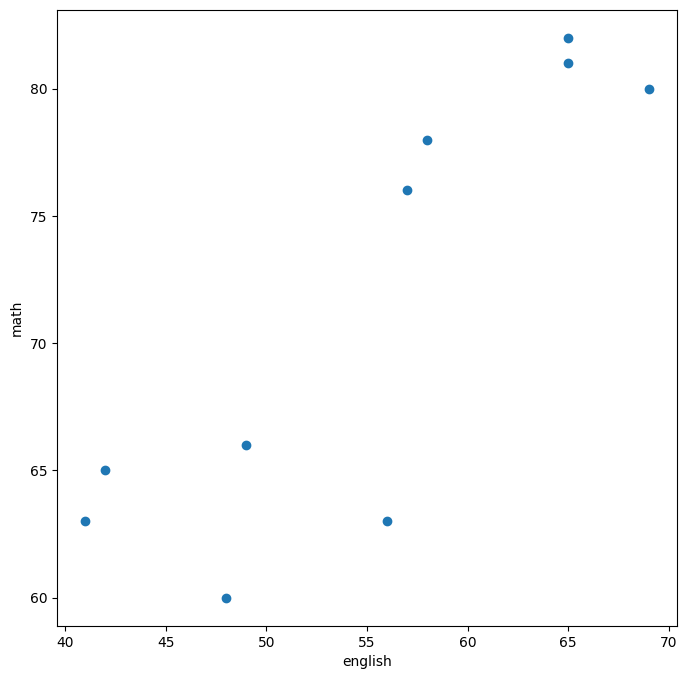

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(scores_df['english'], scores_df['math'])
ax.set_xlabel('english')
ax.set_ylabel('math')
plt.show()

In [ ]:
# 주어진 2차원 point를 가장 잘 fit하는 1차원 그래프의 [기울기, y절편]
poly_fit = np.polyfit(scores_df['english'], scores_df['math'], 1)
# [기울기, y절편]의 데이터를 주면 1차원 함수를 리턴
poly_1d = np.poly1d(poly_fit)
print(poly_fit)
print(poly_1d)

[ 0.763 29.447]
 
0.7628 x + 29.45


In [ ]:
xs = np.linspace(scores_df['english'].min(), scores_df['english'].max())
ys = poly_1d(xs)

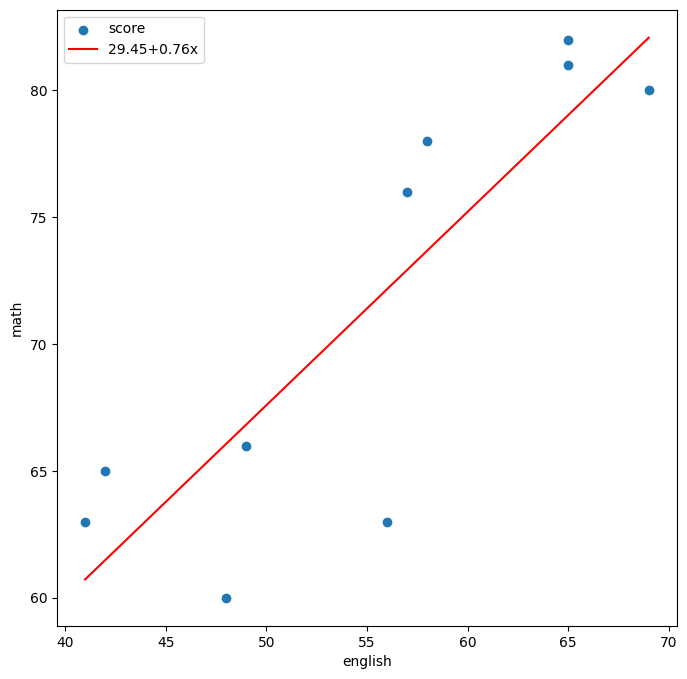

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(scores_df['english'], scores_df['math'], label = 'score')
ax.plot(xs, ys, color = 'red',
        label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x'
        )
ax.set_xlabel('english')
ax.set_ylabel('math')
ax.legend(loc = 'upper left')
plt.show()